# InmobiTech

### Today's objective

2022: We are launching an InmobiTech startup. We need to collect information about leases in Santiago. Ç

![Se arriendo](./Arriendo.jpeg)

👉 Our idea: go to [Portal Inmobiliario](https://www.portalinmobiliario.com) and get all the info!

> By hand? 😳 🤯

> NO! 

## Webscraping

### Web 101

![HTTP Request](./Web.png)

## How Webscraping works --> The idea of this data extraction technique is to replace what we do in a web browser with a Python program. 



#### - What we do in a browser is to write a URL and this what it does is to send a request following the protocol http to a server which returns us the html code, which our browser manages to interpret and to transform with that visual aspect what we see in the web pages.



#### - With Python we can do the same, creating algorithms that generate requests to the server and receive the source code in html format.



#### - There is a Python library called Beutifulsoup, which will help us to analyze html documents and extract data from them. Giving the possibility of being able to access only what we are interested in because a html source code contains a lot of information of which we are interested only in the data that will serve us for our study of interest.

---

![HTML Tag](./Tags.png)

### OK, let's go!

##### We import the Python libraries we need

In [1]:
import requests
import numpy as np 
from bs4 import BeautifulSoup
import re

Request for information from the web:

In [2]:
url = "https://www.portalinmobiliario.com/arriendo/departamento/santiago-metropolitana/"
response = requests.get(url)
soup = BeautifulSoup(response.content)

In [3]:
pages = np.arange(1, 34*40, 40).tolist()

##### Collection function

In [4]:
def transform_html_to_data(soup):
    restaurants_data = soup.find_all(class_='ui-search-layout__item')
    restaurants = []
    for restaurant in restaurants_data:
        price = restaurant.find('span', class_='price-tag-fraction').text
        price = int(price.replace(".", ""))
        address = restaurant.find(class_='ui-search-item__group__element ui-search-item__location shops__items-group-details').text
        space_information = restaurant.find(class_='ui-search-item__group ui-search-item__group--attributes shops__items-group').text
        if space_information:
            size = re.search(r'(\d+) m', space_information)
            if size:
                size = int(size.group(1))
            rooms = re.search(r'(\d+) dormitorio', space_information)
            if rooms:
                rooms = int(rooms.group(1))
        data = {'price (CLP)': price, 'rooms': rooms, 'size (m2)': size, 'address': address}
        restaurants.append(data)

    return restaurants

##### Iterate according to how many `pages` are available

In [5]:
restaurants_list = []
for page in pages:
    url = f"https://www.portalinmobiliario.com/arriendo/departamento/santiago-metropolitana/_Desde_{page}_NoIndex_True"
    response = requests.get(url)
    soup = BeautifulSoup(response.content)
    restaurants_list += transform_html_to_data(soup)

How many apartments were we able to recover?

In [6]:
len(restaurants_list)

1699

##### Transform the data to a DataFrame

In [44]:
import pandas as pd

In [45]:
df = pd.DataFrame(restaurants_list)
df.head(20)

,price (CLP),rooms,size (m2),address
0,430000,2.0,47.0,"Matucana 31, Barrio Yungay, Santiago"
1,310000,NaN,29.0,"Argomedo 344, Santa Isabel, Santiago"
2,270000,1.0,35.0,"Coquimbo 1331, Parque Almagro, Santiago"
3,365000,2.0,44.0,"San Martin 841, Centro Histórico De Santiago, ..."
4,425000,2.0,47.0,"Matucana 31, Barrio Yungay, Santiago"
5,300000,1.0,29.0,"Av. Manuel Rodríguez 881, Centro Histórico De ..."
6,320000,1.0,36.0,"Chiloé 1951, Franklin - Biobío, Santiago"
7,300000,1.0,30.0,"García Reyes 66, Barrio Yungay, Santiago"
8,400000,2.0,42.0,"Chiloé 1951, Franklin - Biobío, Santiago"
9,330000,1.0,30.0,"Lira 195, Santa Isabel, Santiago"


In [46]:
df.shape

(1699, 4)

##### Data cleaning

- Lack of information

In [47]:
df.isna().sum()

price (CLP)     0
rooms          19
size (m2)      22
address         0
dtype: int64

In [48]:
df.dropna(inplace=True)
df.shape

(1658, 4)

In [49]:
df.head(10)

,price (CLP),rooms,size (m2),address
0,430000,2.0,47.0,"Matucana 31, Barrio Yungay, Santiago"
2,270000,1.0,35.0,"Coquimbo 1331, Parque Almagro, Santiago"
3,365000,2.0,44.0,"San Martin 841, Centro Histórico De Santiago, ..."
4,425000,2.0,47.0,"Matucana 31, Barrio Yungay, Santiago"
5,300000,1.0,29.0,"Av. Manuel Rodríguez 881, Centro Histórico De ..."
6,320000,1.0,36.0,"Chiloé 1951, Franklin - Biobío, Santiago"
7,300000,1.0,30.0,"García Reyes 66, Barrio Yungay, Santiago"
8,400000,2.0,42.0,"Chiloé 1951, Franklin - Biobío, Santiago"
9,330000,1.0,30.0,"Lira 195, Santa Isabel, Santiago"
10,368500,1.0,35.0,"Copiapó 1239, Parque Almagro, Santiago"


In [50]:
df['price (CLP)'].max()

70000000

In [51]:
df['price (CLP)'].min()

7

## Calculate Uf to CLP, standardize the data to the same magnitude, in this case CLP.

In [52]:
q_low = df["price (CLP)"].quantile(0.1)
q_hi  = df["price (CLP)"].quantile(0.98)

q_low1 = df["size (m2)"].quantile(0.1)
q_hi1  = df["size (m2)"].quantile(0.98)

df_filtered1= df[(df["size (m2)"] < q_hi1) & (df["size (m2)"] > q_low1)]
df_filtered1
# df_filtered = df[(df["price (CLP)"] < q_hi) & (df["price (CLP)"] > q_low)]


,price (CLP),rooms,size (m2),address
0,430000,2.0,47.0,"Matucana 31, Barrio Yungay, Santiago"
2,270000,1.0,35.0,"Coquimbo 1331, Parque Almagro, Santiago"
3,365000,2.0,44.0,"San Martin 841, Centro Histórico De Santiago, ..."
4,425000,2.0,47.0,"Matucana 31, Barrio Yungay, Santiago"
6,320000,1.0,36.0,"Chiloé 1951, Franklin - Biobío, Santiago"
...,...,...,...,...
1691,360000,2.0,54.0,"Merced 600 - 900, Santiago, Chile, Centro Hist..."
1693,350000,1.0,43.0,"Avenida Vicuña Mackenna 1433, Santiago, Chile,..."
1696,280000,1.0,30.0,"Miraflores 312, Santiago, Chile, Centro Histór..."
1697,435000,1.0,55.0,"Guayaquil, Barrio San Borja, Santiago"


In [53]:
df_filtered = df_filtered1[(df_filtered1["price (CLP)"] < q_hi) & (df_filtered1["price (CLP)"] > q_low)]
df_filtered

,price (CLP),rooms,size (m2),address
0,430000,2.0,47.0,"Matucana 31, Barrio Yungay, Santiago"
3,365000,2.0,44.0,"San Martin 841, Centro Histórico De Santiago, ..."
4,425000,2.0,47.0,"Matucana 31, Barrio Yungay, Santiago"
6,320000,1.0,36.0,"Chiloé 1951, Franklin - Biobío, Santiago"
7,300000,1.0,30.0,"García Reyes 66, Barrio Yungay, Santiago"
...,...,...,...,...
1689,391000,2.0,46.0,"Abdón Cifuentes 150, Santiago, Chile, Barrio R..."
1691,360000,2.0,54.0,"Merced 600 - 900, Santiago, Chile, Centro Hist..."
1693,350000,1.0,43.0,"Avenida Vicuña Mackenna 1433, Santiago, Chile,..."
1696,280000,1.0,30.0,"Miraflores 312, Santiago, Chile, Centro Histór..."


## Uf to CLP calculation and dataframe updating

In [54]:
# uf = 34750
# min_price_charters = 3




# df_filtered['price (CLP)'] = df_filtered['price (CLP)'].map(lambda x : x if len(str(x)) > min_price_charters else x * uf)

# df['price (CLP)'] = df['price (CLP)'].map(lambda x : x if len(str(x)) > min_price_charters and len(str(x)) < max_price_charters else df.drop(['price (CLP)']))

In [55]:
df_filtered['price (CLP)'].max()

595000

In [56]:
df_filtered['price (CLP)'].min()

275000

In [57]:
df_filtered['price (CLP)'].mean()

385671.4826224329

In [58]:
df_filtered.to_csv('./RegionMetropolitanalimpio.csv')

- Outliers

> Lease price less than 500000 CLP

In [59]:
condition = df_filtered['price (CLP)'] < 500000
df_filtered = df_filtered[condition]
df_filtered

,price (CLP),rooms,size (m2),address
0,430000,2.0,47.0,"Matucana 31, Barrio Yungay, Santiago"
3,365000,2.0,44.0,"San Martin 841, Centro Histórico De Santiago, ..."
4,425000,2.0,47.0,"Matucana 31, Barrio Yungay, Santiago"
6,320000,1.0,36.0,"Chiloé 1951, Franklin - Biobío, Santiago"
7,300000,1.0,30.0,"García Reyes 66, Barrio Yungay, Santiago"
...,...,...,...,...
1689,391000,2.0,46.0,"Abdón Cifuentes 150, Santiago, Chile, Barrio R..."
1691,360000,2.0,54.0,"Merced 600 - 900, Santiago, Chile, Centro Hist..."
1693,350000,1.0,43.0,"Avenida Vicuña Mackenna 1433, Santiago, Chile,..."
1696,280000,1.0,30.0,"Miraflores 312, Santiago, Chile, Centro Histór..."


In [60]:
df_filtered.shape

(1158, 4)

> Price greater than 300,000 CLP

In [61]:
condition = df_filtered['price (CLP)'] > 300000
df_filtered = df_filtered[condition]
df_filtered

,price (CLP),rooms,size (m2),address
0,430000,2.0,47.0,"Matucana 31, Barrio Yungay, Santiago"
3,365000,2.0,44.0,"San Martin 841, Centro Histórico De Santiago, ..."
4,425000,2.0,47.0,"Matucana 31, Barrio Yungay, Santiago"
6,320000,1.0,36.0,"Chiloé 1951, Franklin - Biobío, Santiago"
8,400000,2.0,42.0,"Chiloé 1951, Franklin - Biobío, Santiago"
...,...,...,...,...
1687,469000,2.0,53.0,"Manuel Antonio Tocornal 661, Santiago, Chile, ..."
1689,391000,2.0,46.0,"Abdón Cifuentes 150, Santiago, Chile, Barrio R..."
1691,360000,2.0,54.0,"Merced 600 - 900, Santiago, Chile, Centro Hist..."
1693,350000,1.0,43.0,"Avenida Vicuña Mackenna 1433, Santiago, Chile,..."


In [62]:
df_filtered.shape

(996, 4)

> Less than 5 pieces

In [63]:
condition = df_filtered['rooms'] < 5
df_filtered = df_filtered[condition]
df_filtered

,price (CLP),rooms,size (m2),address
0,430000,2.0,47.0,"Matucana 31, Barrio Yungay, Santiago"
3,365000,2.0,44.0,"San Martin 841, Centro Histórico De Santiago, ..."
4,425000,2.0,47.0,"Matucana 31, Barrio Yungay, Santiago"
6,320000,1.0,36.0,"Chiloé 1951, Franklin - Biobío, Santiago"
8,400000,2.0,42.0,"Chiloé 1951, Franklin - Biobío, Santiago"
...,...,...,...,...
1687,469000,2.0,53.0,"Manuel Antonio Tocornal 661, Santiago, Chile, ..."
1689,391000,2.0,46.0,"Abdón Cifuentes 150, Santiago, Chile, Barrio R..."
1691,360000,2.0,54.0,"Merced 600 - 900, Santiago, Chile, Centro Hist..."
1693,350000,1.0,43.0,"Avenida Vicuña Mackenna 1433, Santiago, Chile,..."


In [64]:
df_filtered.shape

(996, 4)

### Data Visualization

In [65]:
import seaborn as sns
import plotly.express as px

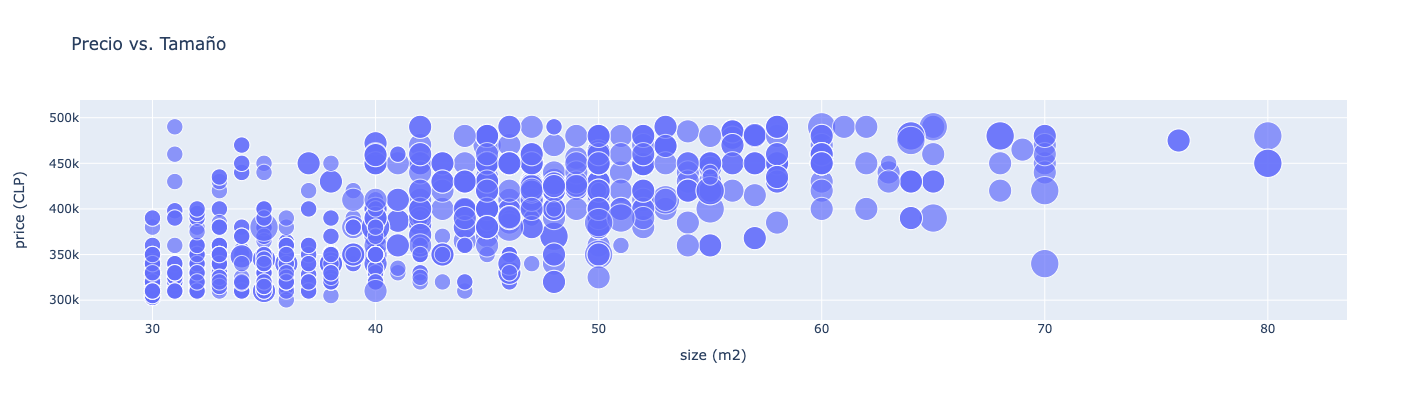

In [66]:
fig = px.scatter(df_filtered, x="size (m2)", y="price (CLP)", size="rooms", title="Precio vs. Tamaño", width=800, height=400)
fig.show()

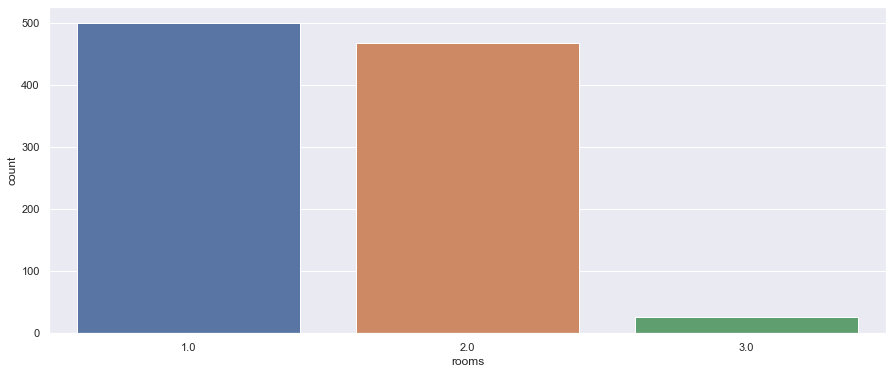

In [68]:
sns.countplot(x="rooms", data=df_filtered)
sns.set(rc={'figure.figsize':(15, 6)})

3681# sns.catplot(x='rooms', y='price (CLP)', data=df, kind="box")

<AxesSubplot:xlabel='size (m2)', ylabel='price (CLP)'>

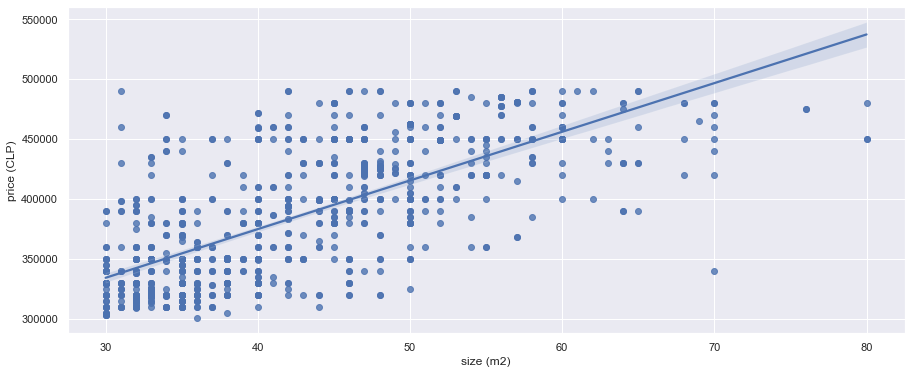

In [69]:
sns.regplot(x='size (m2)', y='price (CLP)', data=df_filtered)

In [71]:
condition = df_filtered['size (m2)'] < 200
df_max_size_200 = df_filtered[condition]
df_max_size_200

,price (CLP),rooms,size (m2),address
0,430000,2.0,47.0,"Matucana 31, Barrio Yungay, Santiago"
3,365000,2.0,44.0,"San Martin 841, Centro Histórico De Santiago, ..."
4,425000,2.0,47.0,"Matucana 31, Barrio Yungay, Santiago"
6,320000,1.0,36.0,"Chiloé 1951, Franklin - Biobío, Santiago"
8,400000,2.0,42.0,"Chiloé 1951, Franklin - Biobío, Santiago"
...,...,...,...,...
1687,469000,2.0,53.0,"Manuel Antonio Tocornal 661, Santiago, Chile, ..."
1689,391000,2.0,46.0,"Abdón Cifuentes 150, Santiago, Chile, Barrio R..."
1691,360000,2.0,54.0,"Merced 600 - 900, Santiago, Chile, Centro Hist..."
1693,350000,1.0,43.0,"Avenida Vicuña Mackenna 1433, Santiago, Chile,..."


In [72]:
df.shape

(1658, 4)

In [73]:
df_max_size_200.shape

(996, 4)

<AxesSubplot:xlabel='size (m2)', ylabel='price (CLP)'>

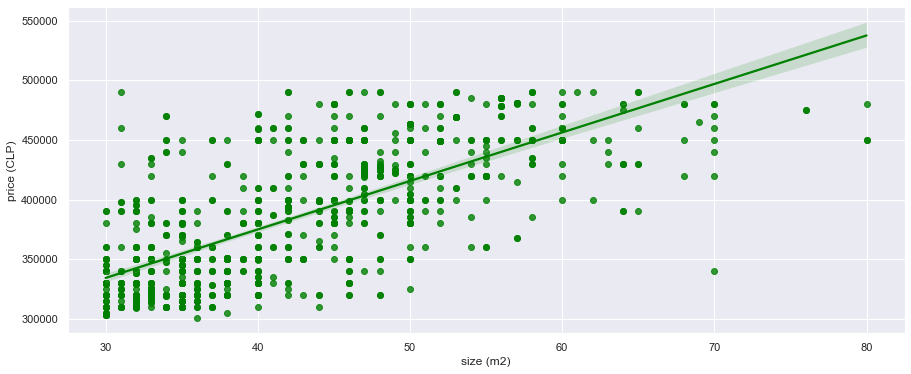

In [74]:
sns.regplot(x='size (m2)', y='price (CLP)', data=df_max_size_200, color='green')

##### Export to CSV 

Taking advantage of the **Pandas** library, we use only `.to_csv()`.

In [75]:
df_max_size_200.to_csv('./RegionMetropolitana.csv')

## Machine Learning
### Linnear regression

In [92]:
data = pd.read_csv('./RegionMetropolitanalimpio.csv')
data

,Unnamed: 0,price (CLP),rooms,size (m2),address
0,0,430000,2.0,47.0,"Matucana 31, Barrio Yungay, Santiago"
1,3,365000,2.0,44.0,"San Martin 841, Centro Histórico De Santiago, ..."
2,4,425000,2.0,47.0,"Matucana 31, Barrio Yungay, Santiago"
3,6,320000,1.0,36.0,"Chiloé 1951, Franklin - Biobío, Santiago"
4,7,300000,1.0,30.0,"García Reyes 66, Barrio Yungay, Santiago"
...,...,...,...,...,...
1261,1689,391000,2.0,46.0,"Abdón Cifuentes 150, Santiago, Chile, Barrio R..."
1262,1691,360000,2.0,54.0,"Merced 600 - 900, Santiago, Chile, Centro Hist..."
1263,1693,350000,1.0,43.0,"Avenida Vicuña Mackenna 1433, Santiago, Chile,..."
1264,1696,280000,1.0,30.0,"Miraflores 312, Santiago, Chile, Centro Histór..."


In [93]:
data.drop(['Unnamed: 0'], axis=1)

,price (CLP),rooms,size (m2),address
0,430000,2.0,47.0,"Matucana 31, Barrio Yungay, Santiago"
1,365000,2.0,44.0,"San Martin 841, Centro Histórico De Santiago, ..."
2,425000,2.0,47.0,"Matucana 31, Barrio Yungay, Santiago"
3,320000,1.0,36.0,"Chiloé 1951, Franklin - Biobío, Santiago"
4,300000,1.0,30.0,"García Reyes 66, Barrio Yungay, Santiago"
...,...,...,...,...
1261,391000,2.0,46.0,"Abdón Cifuentes 150, Santiago, Chile, Barrio R..."
1262,360000,2.0,54.0,"Merced 600 - 900, Santiago, Chile, Centro Hist..."
1263,350000,1.0,43.0,"Avenida Vicuña Mackenna 1433, Santiago, Chile,..."
1264,280000,1.0,30.0,"Miraflores 312, Santiago, Chile, Centro Histór..."


In [94]:
livecode_data = data[['size (m2)','price (CLP)']]
livecode_data.head()

,size (m2),price (CLP)
0,47.0,430000
1,44.0,365000
2,47.0,425000
3,36.0,320000
4,30.0,300000


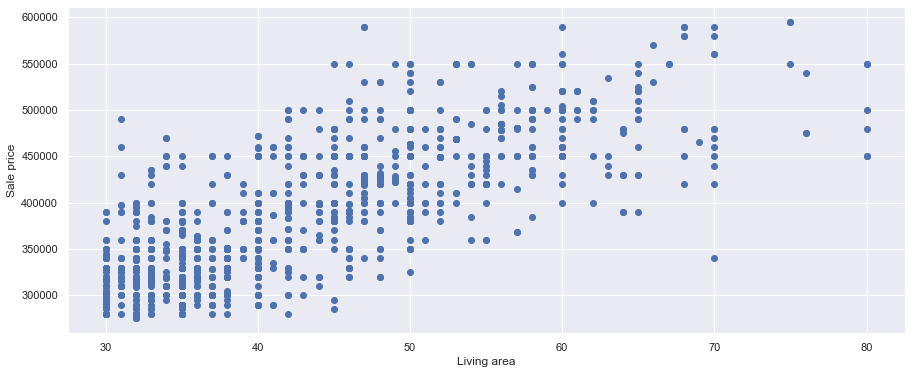

In [95]:
import matplotlib.pyplot as plt # Plot Living area vs Sale price
plt.scatter(data['size (m2)'], data['price (CLP)'])
#
# Labels
plt.xlabel("Living area")
plt.ylabel("Sale price")
plt.show()

<AxesSubplot:xlabel='size (m2)', ylabel='price (CLP)'>

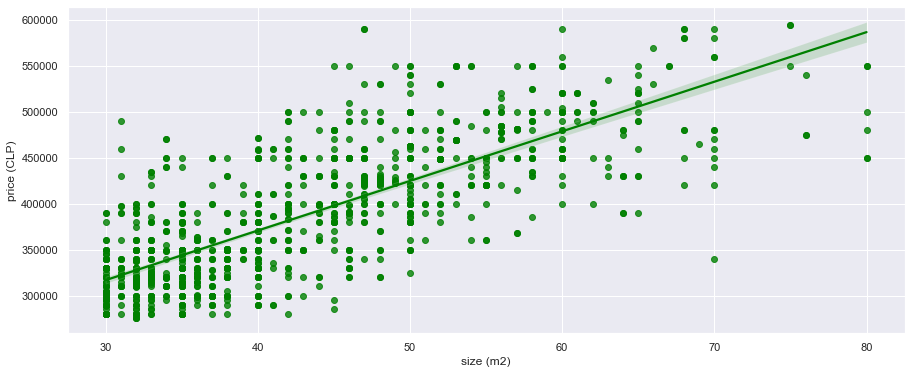

In [96]:
sns.regplot(x='size (m2)', y='price (CLP)', data=data, color='green')

<AxesSubplot:>

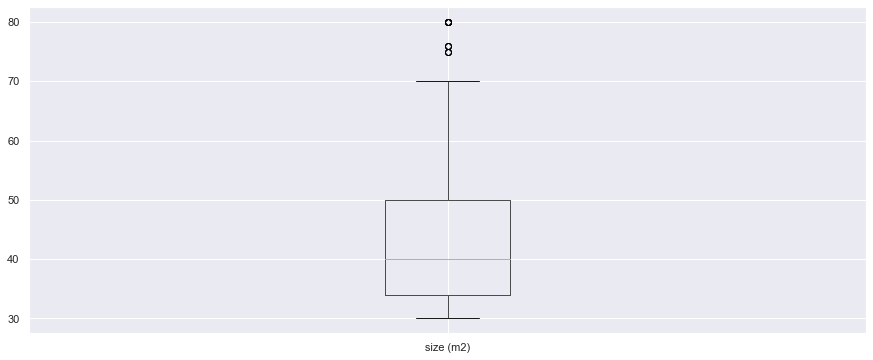

In [97]:
data[['size (m2)']].boxplot()

<AxesSubplot:>

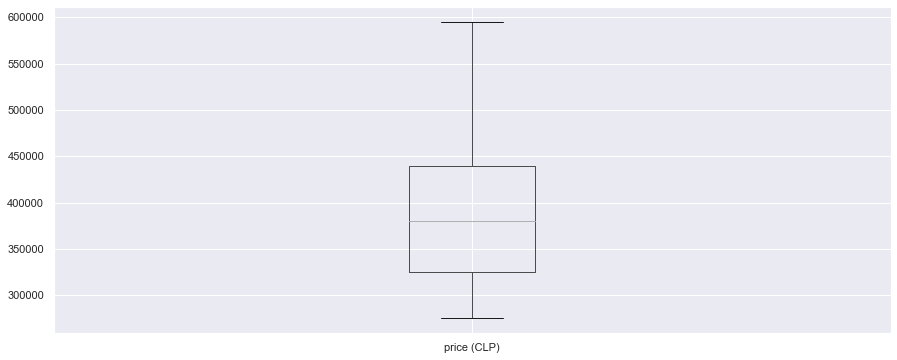

In [98]:
data[['price (CLP)']].boxplot()

## Training

- Training a Linear Regression model with Sklearn LinearRegression

In [99]:
from sklearn.linear_model import LinearRegression # Instanciate the model

model = LinearRegression()

# Define X and y
X = data[['size (m2)']] # a dataframe of featureres
y = data['price (CLP)'] #a series of target

# Train the model on the data
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- At this stage, the model has learned the optimal slope a and intercept b needed to map the relationship between X and y.

## Model Attributes
- a (slope) and b (intercept) are stored as model attributes and can be accessed.


In [100]:
 # View the model's slope (a)
model.coef_

array([5401.04430727])

In [101]:
# View the model's intercept (b)
model.intercept_

154714.9781846384

In [102]:
 # Evaluate the model's performance / R2
model.score(X,y)

0.6107772132037509

## Prediction

-  The train model will help us to predict new data.

In [107]:
#  Predict on new data
model.predict([[50]])

array([422491.18180958])

### Therefore, an apartment with a surface area of X m2 has a predicted rental value of $Y pesos per month.

Pasos

1. Import the model: from sklearn import model
2. Instantiate the model: model = model()
3. Train the model: model.fit(X, y)
4. Evaluate the model: model.score(new_X, new_y) 5. Make predictions: model.predict(new_X)


## Generalization

- The performance of a Machine Learning model is evaluated on its ability to generalize when predicting unseen data.

## The Holdout Method

-  The Holdout Method is used to evaluate a model's ability to generalize. It consists of splitting the dataset into two sets:

### Training set (70%) Testing set (30%)
### Model.score() on the test set

In [108]:
from sklearn.model_selection import train_test_split # split the data into train and test



train_data, test_data = train_test_split(livecode_data, test_size=0.3)
# Ready X's and y's

X_train = train_data[['size (m2)']]
y_train = train_data['price (CLP)']

X_test = test_data[['size (m2)']]
y_test = test_data['price (CLP)']

In [109]:
# Ready X and y
X = livecode_data[['size (m2)']]
y = livecode_data['price (CLP)']

# Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [110]:
# Instantiate the model
model = LinearRegression()

# Train the model on the Training data
model.fit(X_train, y_train)

# Score the model on the Test data

model.score(X_test,y_test)

0.6209283366805989

To improve performance, you can iterate through these steps: 
    
- Collect data: Increase the number of training examples. 
- Feature processing: Add more variables and better feature processing.

In [113]:
model.predict([[40]])

array([370630.92551243])

## Calculations for finding good leasing / investment opportunities

In [114]:
data1 = pd.read_csv('./RegionMetropolitanalimpio.csv')
data1

,Unnamed: 0,price (CLP),rooms,size (m2),address
0,0,430000,2.0,47.0,"Matucana 31, Barrio Yungay, Santiago"
1,3,365000,2.0,44.0,"San Martin 841, Centro Histórico De Santiago, ..."
2,4,425000,2.0,47.0,"Matucana 31, Barrio Yungay, Santiago"
3,6,320000,1.0,36.0,"Chiloé 1951, Franklin - Biobío, Santiago"
4,7,300000,1.0,30.0,"García Reyes 66, Barrio Yungay, Santiago"
...,...,...,...,...,...
1261,1689,391000,2.0,46.0,"Abdón Cifuentes 150, Santiago, Chile, Barrio R..."
1262,1691,360000,2.0,54.0,"Merced 600 - 900, Santiago, Chile, Centro Hist..."
1263,1693,350000,1.0,43.0,"Avenida Vicuña Mackenna 1433, Santiago, Chile,..."
1264,1696,280000,1.0,30.0,"Miraflores 312, Santiago, Chile, Centro Histór..."


In [115]:
data2 = data1.drop(['Unnamed: 0'], axis=1)

data2

,price (CLP),rooms,size (m2),address
0,430000,2.0,47.0,"Matucana 31, Barrio Yungay, Santiago"
1,365000,2.0,44.0,"San Martin 841, Centro Histórico De Santiago, ..."
2,425000,2.0,47.0,"Matucana 31, Barrio Yungay, Santiago"
3,320000,1.0,36.0,"Chiloé 1951, Franklin - Biobío, Santiago"
4,300000,1.0,30.0,"García Reyes 66, Barrio Yungay, Santiago"
...,...,...,...,...
1261,391000,2.0,46.0,"Abdón Cifuentes 150, Santiago, Chile, Barrio R..."
1262,360000,2.0,54.0,"Merced 600 - 900, Santiago, Chile, Centro Hist..."
1263,350000,1.0,43.0,"Avenida Vicuña Mackenna 1433, Santiago, Chile,..."
1264,280000,1.0,30.0,"Miraflores 312, Santiago, Chile, Centro Histór..."


In [117]:
index = data2.index
number_of_rows = len(index)
number_of_rows

1266

In [118]:
import math


data2['clp/m2'] = (data2['price (CLP)'] / data2['size (m2)']) / 10000
data2['clp/m2'] = data2['clp/m2'].round(2)

data2.replace([np.inf, -np.inf], np.nan, inplace=True)
data2.dropna(subset=['clp/m2'], inplace=True)
mean = data2['clp/m2'].mean()

data2['clp/m2 mean'] = data2['clp/m2'].mean() 

data2['over clp/m2 mean'] = data2['clp/m2'].map(lambda x : True if x > mean else False)

data2['dif'] = data2['clp/m2'] - data2['clp/m2 mean']

data2['dif^2'] = data2['dif'] * data2['dif'] 
#
data2['desv'] = math.sqrt((sum(data2['dif^2']) / (number_of_rows - 1)))

data2['sigma'] = (data2['dif'] / data2['desv'])

data2['dif prom'] =  data2['dif'] / data2['clp/m2 mean']

data2

,price (CLP),rooms,size (m2),address,clp/m2,clp/m2 mean,over clp/m2 mean,dif,dif^2,desv,sigma,dif prom
0,430000,2.0,47.0,"Matucana 31, Barrio Yungay, Santiago",0.91,0.920948,False,-0.010948,0.000120,0.132174,-0.082829,-0.011888
1,365000,2.0,44.0,"San Martin 841, Centro Histórico De Santiago, ...",0.83,0.920948,False,-0.090948,0.008272,0.132174,-0.688093,-0.098755
2,425000,2.0,47.0,"Matucana 31, Barrio Yungay, Santiago",0.90,0.920948,False,-0.020948,0.000439,0.132174,-0.158487,-0.022746
3,320000,1.0,36.0,"Chiloé 1951, Franklin - Biobío, Santiago",0.89,0.920948,False,-0.030948,0.000958,0.132174,-0.234145,-0.033604
4,300000,1.0,30.0,"García Reyes 66, Barrio Yungay, Santiago",1.00,0.920948,True,0.079052,0.006249,0.132174,0.598092,0.085838
...,...,...,...,...,...,...,...,...,...,...,...,...
1261,391000,2.0,46.0,"Abdón Cifuentes 150, Santiago, Chile, Barrio R...",0.85,0.920948,False,-0.070948,0.005034,0.132174,-0.536777,-0.077038
1262,360000,2.0,54.0,"Merced 600 - 900, Santiago, Chile, Centro Hist...",0.67,0.920948,False,-0.250948,0.062975,0.132174,-1.898619,-0.272489
1263,350000,1.0,43.0,"Avenida Vicuña Mackenna 1433, Santiago, Chile,...",0.81,0.920948,False,-0.110948,0.012309,0.132174,-0.839409,-0.120471
1264,280000,1.0,30.0,"Miraflores 312, Santiago, Chile, Centro Histór...",0.93,0.920948,True,0.009052,0.000082,0.132174,0.068487,0.009829


## Logic

Lower Sigma better (KPI) ----> Cheaper, better opportunity

Higher Sigma Worse ----> More expensive

Let's order them to see the best opportunities, i.e. those that are sigma times further from the average to the left, those will be the cheapest or most convenient based on their CLP and UF ratios.

In [120]:
order = data2.sort_values('sigma')   
order.head(30)

,price (CLP),rooms,size (m2),address,clp/m2,clp/m2 mean,over clp/m2 mean,dif,dif^2,desv,sigma,dif prom
1257,340000,3.0,70.0,"Av. Brasil 600 - 900, Santiago, Chile, Parque ...",0.49,0.920948,False,-0.430948,0.185716,0.132174,-3.260462,-0.467939
1152,450000,3.0,80.0,"Moneda 1200 - 1500, Santiago, Chile, Centro Hi...",0.56,0.920948,False,-0.360948,0.130283,0.132174,-2.730857,-0.391931
1186,450000,3.0,80.0,"Moneda 1200 - 1500, Santiago, Chile, Centro Hi...",0.56,0.920948,False,-0.360948,0.130283,0.132174,-2.730857,-0.391931
596,480000,3.0,80.0,"Ricardo Cumming, Parque Los Reyes, Santiago",0.60,0.920948,False,-0.320948,0.103008,0.132174,-2.428225,-0.348497
1128,420000,3.0,70.0,"Placer 1156, Santiago, Chile, Franklin - Biobí...",0.60,0.920948,False,-0.320948,0.103008,0.132174,-2.428225,-0.348497
335,390000,3.0,65.0,"Avenida Vicuña Mackenna 1751, Ñuñoa, Santiago,...",0.60,0.920948,False,-0.320948,0.103008,0.132174,-2.428225,-0.348497
752,390000,2.0,64.0,"Avenida San Pablo 1503, Santiago, Chile, Centr...",0.61,0.920948,False,-0.310948,0.096689,0.132174,-2.352567,-0.337639
743,390000,2.0,64.0,"Avenida San Pablo 1503, Santiago, Chile, Centr...",0.61,0.920948,False,-0.310948,0.096689,0.132174,-2.352567,-0.337639
1112,475000,2.0,76.0,"Metro Parque Bustamante, Santa Isabel, Santiago",0.62,0.920948,False,-0.300948,0.090570,0.132174,-2.276909,-0.326781
112,500000,2.0,80.0,"San Diego, Parque O'higgins, Santiago",0.62,0.920948,False,-0.300948,0.090570,0.132174,-2.276909,-0.326781


## Idea

- Add links to facilitate the search